In [3]:
# ==============================================
# COMMON IMPORTS (Run this cell first)
# ==============================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
import seaborn as sns
import os
import zipfile
import requests
import io

# Set random seeds for reproducibility (optional)
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow Version:", tf.__version__)
print("Keras Version:", keras.__version__)

/Users/aditya/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


TensorFlow Version: 2.19.0
Keras Version: 3.9.2


In [2]:
!pip3 install tensorflow -q


--- Assignment 1: Feedforward Neural Network (FNN) ---
Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step 
x_train shape: (60000, 784)
y_train shape: (60000, 10)
Building FNN model...


Model: "basic_fnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Compiling model...
Training model...
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7539 - loss: 0.7956 - val_accuracy: 0.9587 - val_loss: 0.1471
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 0.2163 - val_accuracy: 0.9705 - val_loss: 0.1040
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9522 - loss: 0.1590 - val_accuracy: 0.9732 - val_loss: 0.0911
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9599 - loss: 0.1294 - val_accuracy: 0.9770 - val_loss: 0.0828
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9662 - loss: 0.1117 - val_accuracy: 0.9767 - val_loss: 0.0783
Evaluating model...
Test loss: 0.0879
Test accuracy: 0.9738
Making predictions on first 5 test samples...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted classes: [7 2 1 0 4]
True classes: [7 2 1 0 4]


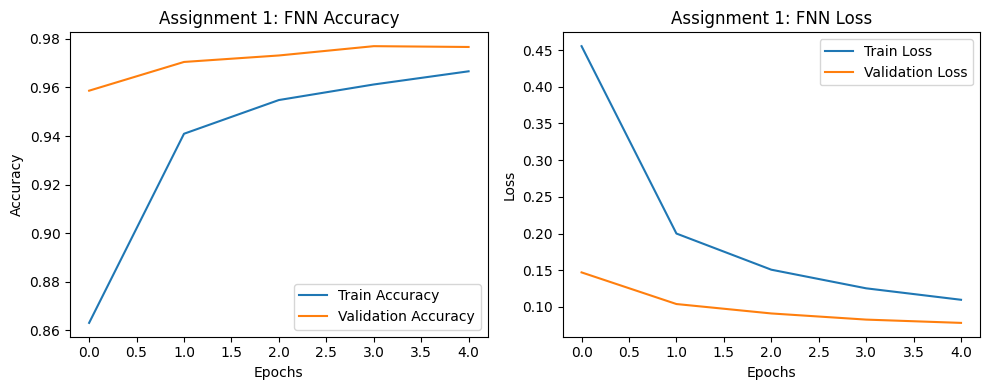

In [4]:
# ==============================================
# Assignment 1: Feedforward Neural Network (FNN)
# ==============================================
print("\n--- Assignment 1: Feedforward Neural Network (FNN) ---")

# --- 1. Dataset Preparation (Using MNIST as an example) ---
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess Data: Normalize pixel values and flatten images
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# --- 2. Model Architecture ---
print("Building FNN model...")
model_fnn = keras.Sequential(
    [
        keras.Input(shape=(784,), name="input_layer"),
        layers.Dense(128, activation="relu", name="hidden_layer_1"),
        layers.Dropout(0.3), # Example of Dropout Regularization
        layers.Dense(64, activation="relu", name="hidden_layer_2"),
        layers.Dense(num_classes, activation="softmax", name="output_layer"),
    ],
    name="basic_fnn"
)
model_fnn.summary()

# --- 3. Compiling the Model ---
print("Compiling model...")
model_fnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# --- 4. Training the Model ---
print("Training model...")
batch_size = 128
epochs = 5 # Reduced for quick demo
history_fnn = model_fnn.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# --- 5. Evaluating the Model ---
print("Evaluating model...")
score_fnn = model_fnn.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {score_fnn[0]:.4f}")
print(f"Test accuracy: {score_fnn[1]:.4f}")

# --- 6. Making Predictions (Optional) ---
print("Making predictions on first 5 test samples...")
predictions_fnn = model_fnn.predict(x_test[:5])
predicted_classes_fnn = np.argmax(predictions_fnn, axis=1)
true_classes_fnn = np.argmax(y_test[:5], axis=1)
print("Predicted classes:", predicted_classes_fnn)
print("True classes:", true_classes_fnn)

# --- Plot training history (Optional) ---
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history_fnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_fnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Assignment 1: FNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_fnn.history['loss'], label='Train Loss')
plt.plot(history_fnn.history['val_loss'], label='Validation Loss')
plt.title('Assignment 1: FNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()